# Test notebook

In [1]:
library(ArchR)
library(org.Ss.eg.db)
library(SuscrofaTxdb.11.108.july)
library(patchwork)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(scales)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [5]:
addArchRThreads(1)
addArchRLocking(locking = TRUE)

Setting default number of Parallel threads to 1.

Setting ArchRLocking to TRUE.



In [6]:
custom_colors <- list()

colors_dutch <- c(
  '#FFC312','#C4E538','#12CBC4','#FDA7DF','#ED4C67',
  '#F79F1F','#A3CB38','#1289A7','#D980FA','#B53471',
  '#EE5A24','#009432','#0652DD','#9980FA','#833471',
  '#EA2027','#006266','#1B1464','#5758BB','#6F1E51'
)

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [7]:
load(file = "/home/adufour/work/rds_storage/omics/archr_all_v6_stemcells.RData")

In [8]:
p1 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_ATAC", size = 2.5, labelAsFactors=F, labelMeans=F)
p2 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_RNA", size = 2.5, labelAsFactors=F, labelMeans=F)
p3 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Combined", size = 2.5, labelAsFactors=F, labelMeans=F)
p4 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Harmony", size = 2.5, labelAsFactors=F, labelMeans=F)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3830347a6a4f53-Date-2023-08-22_Time-15-59-09.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3830347a6a4f53-Date-2023-08-22_Time-15-59-09.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3830344d3ff5c5-Date-2023-08-22_Time-15-59-11.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3830344d3ff5c5-Date-2023-08-22_Time-15-59-11.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3830342fedf9dd-Date-2023-08-22_Time-15-59-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3830342fedf9dd-Date-2023-08

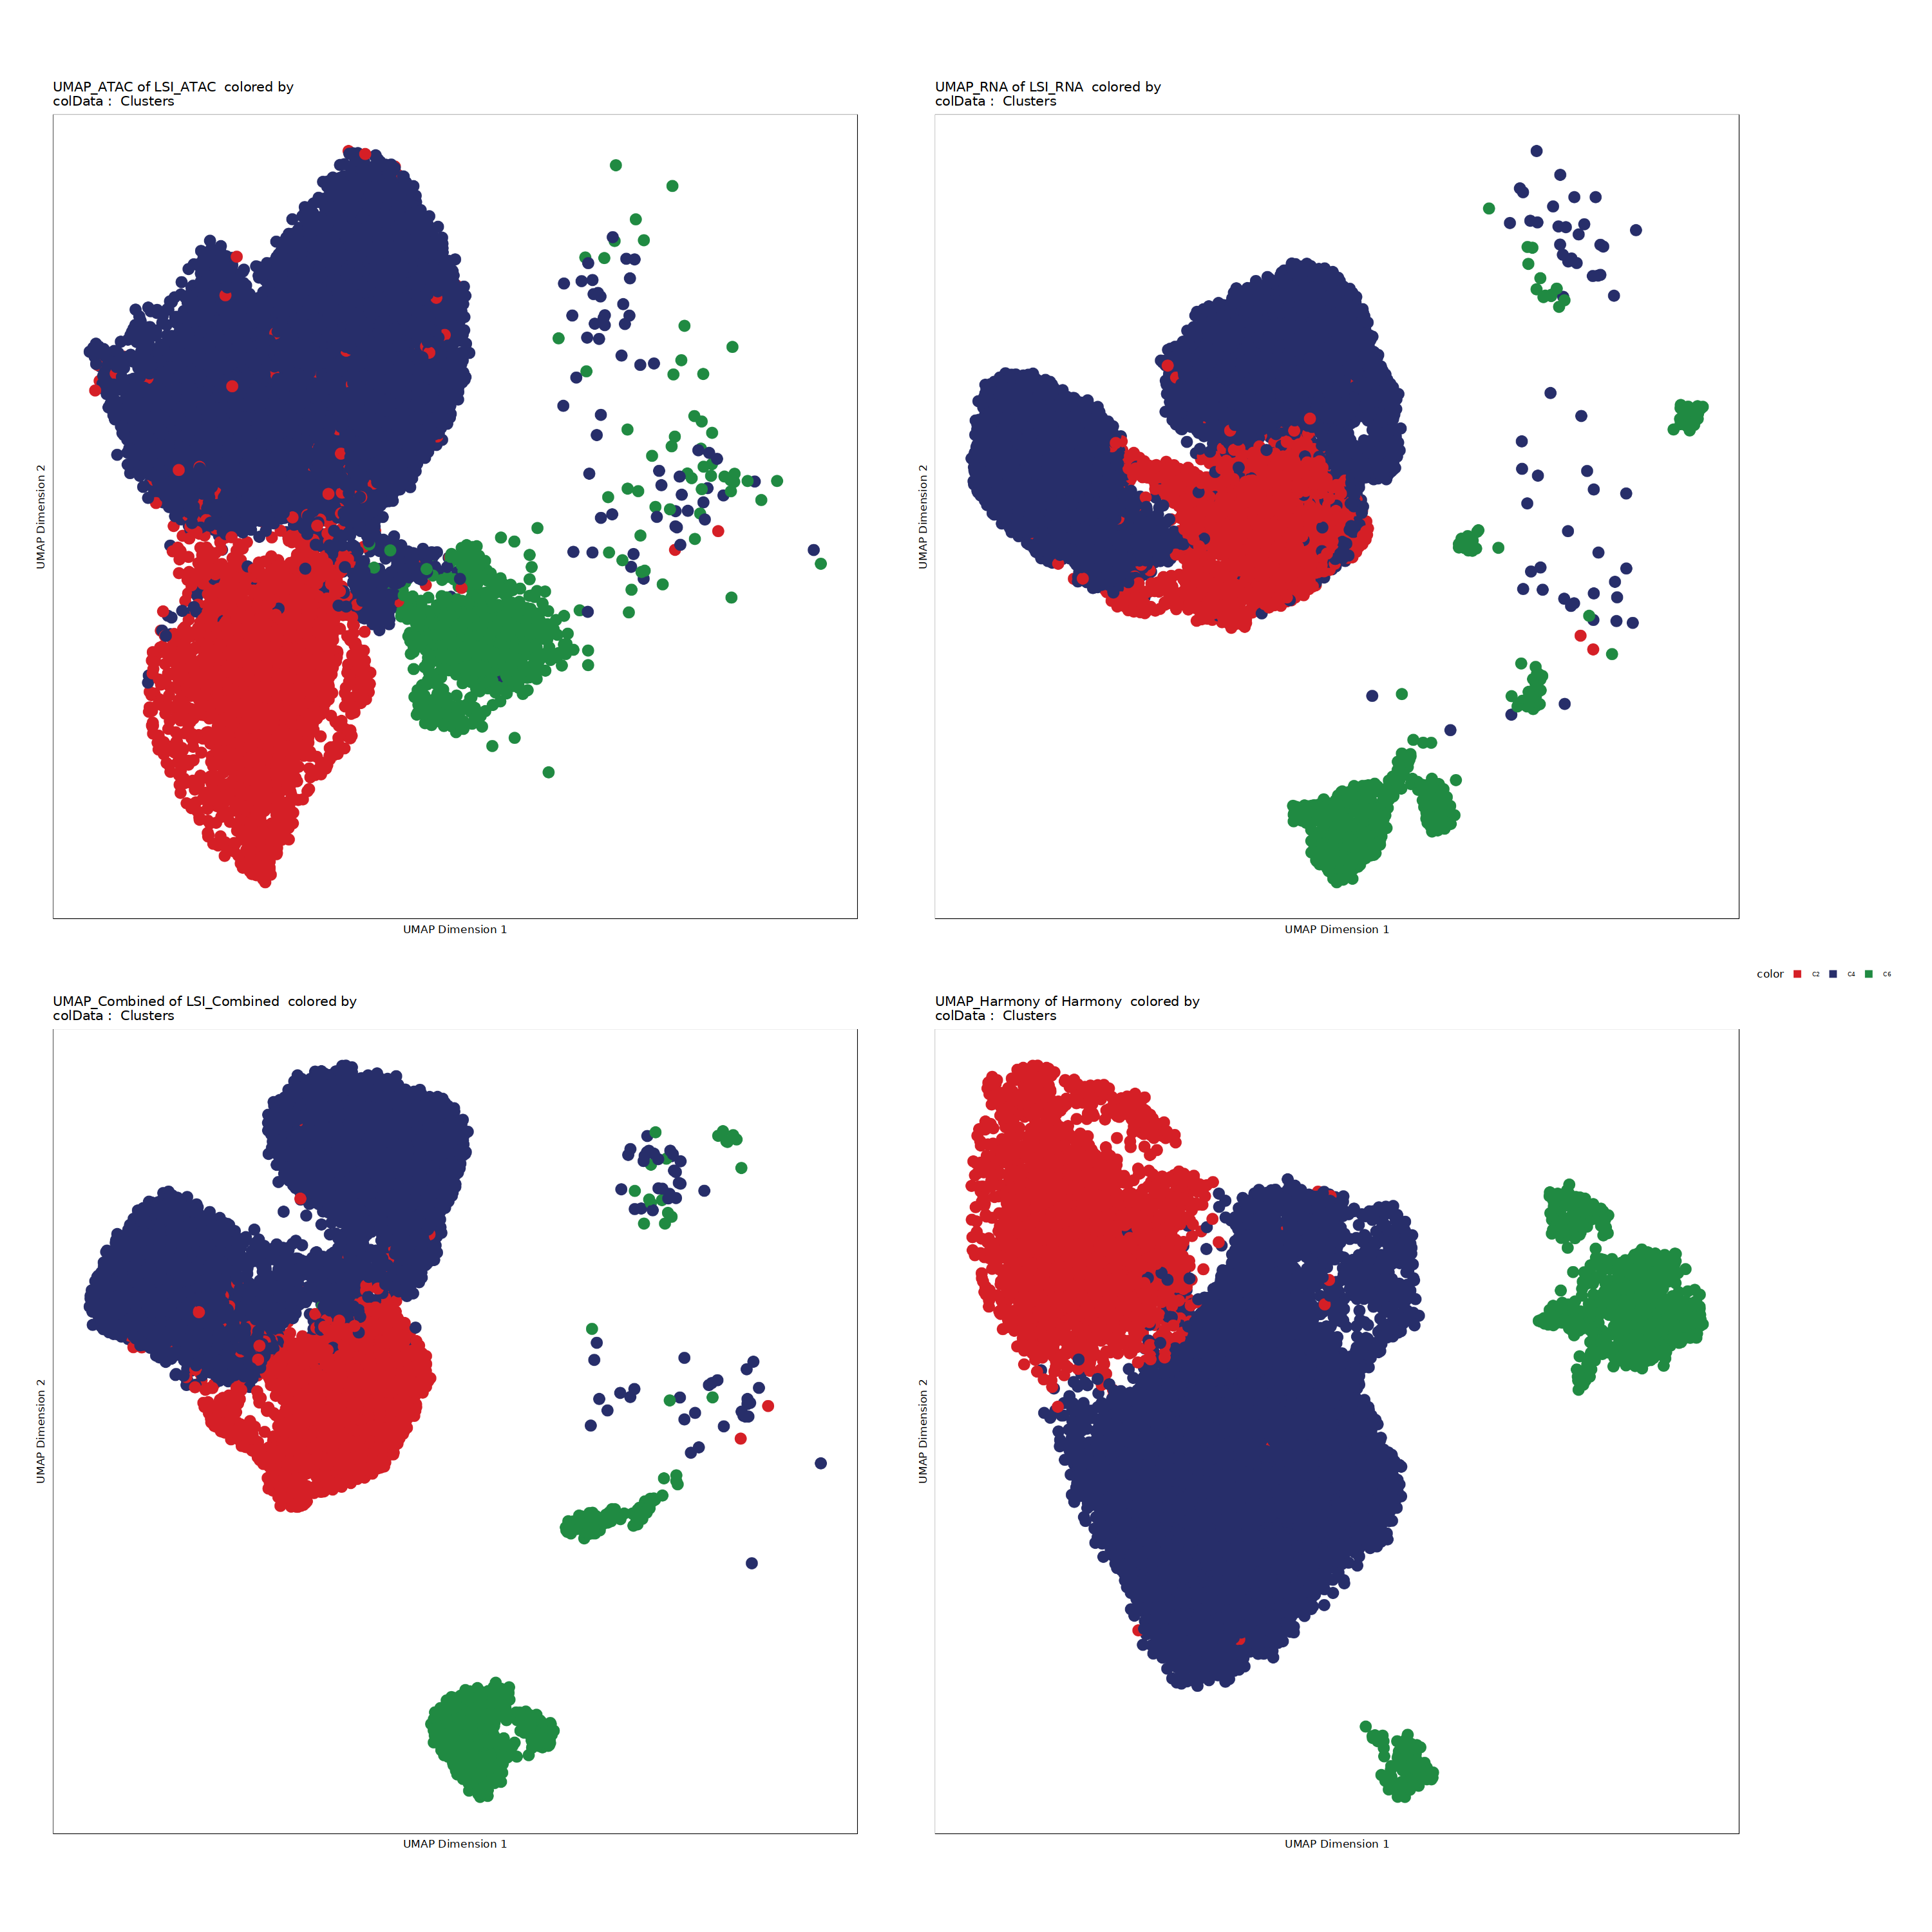

In [9]:
options(repr.plot.width = 25, repr.plot.height = 25)
p1 + p2 + p3 + p4 + patchwork::plot_layout(nrow = 2, guides = "collect")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3830345b186ac5-Date-2023-08-22_Time-15-59-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3830345b186ac5-Date-2023-08-22_Time-15-59-22.log



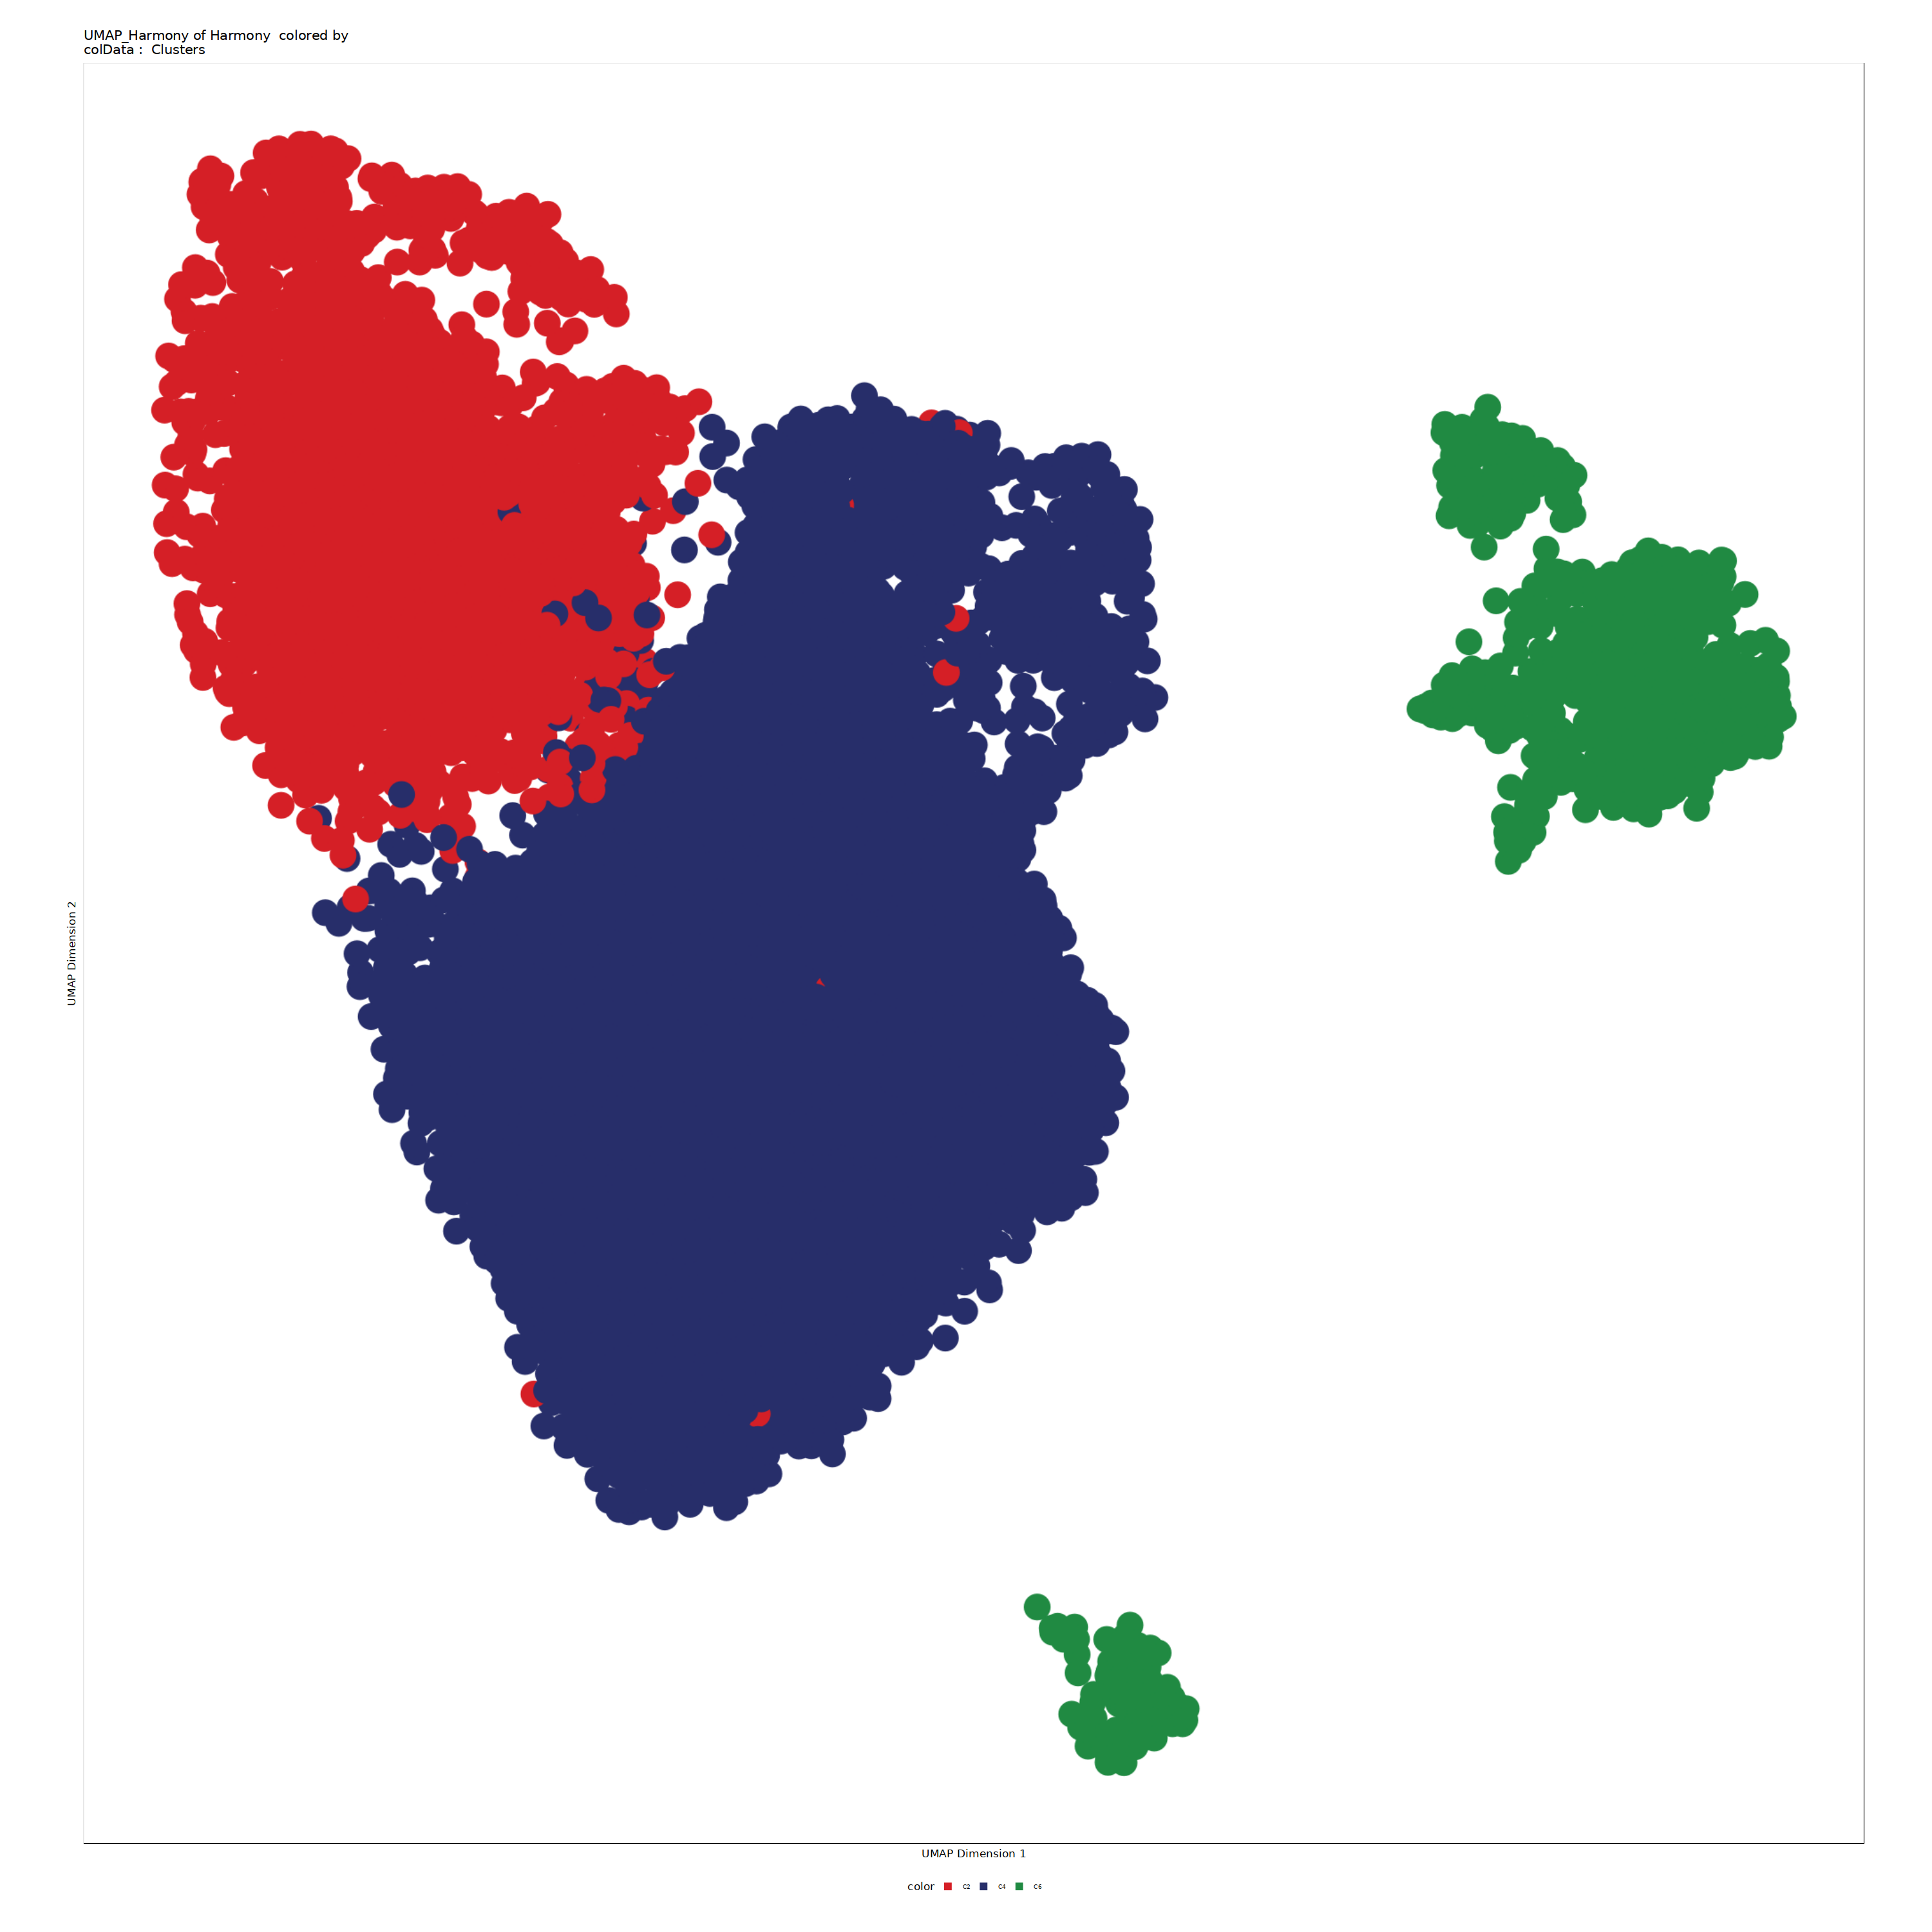

In [10]:
#archrproj <- addClusters(archrproj, reducedDims = "Harmony", name = "Clusters", resolution = 0.1, force = TRUE)
p4 <- plotEmbedding(archrproj_sub, name = "Clusters", embedding = "UMAP_Harmony", size = 2.5, labelAsFactors=F, labelMeans=F)
p4

In [11]:
p4$data$color <- as.character(p4$data$color)

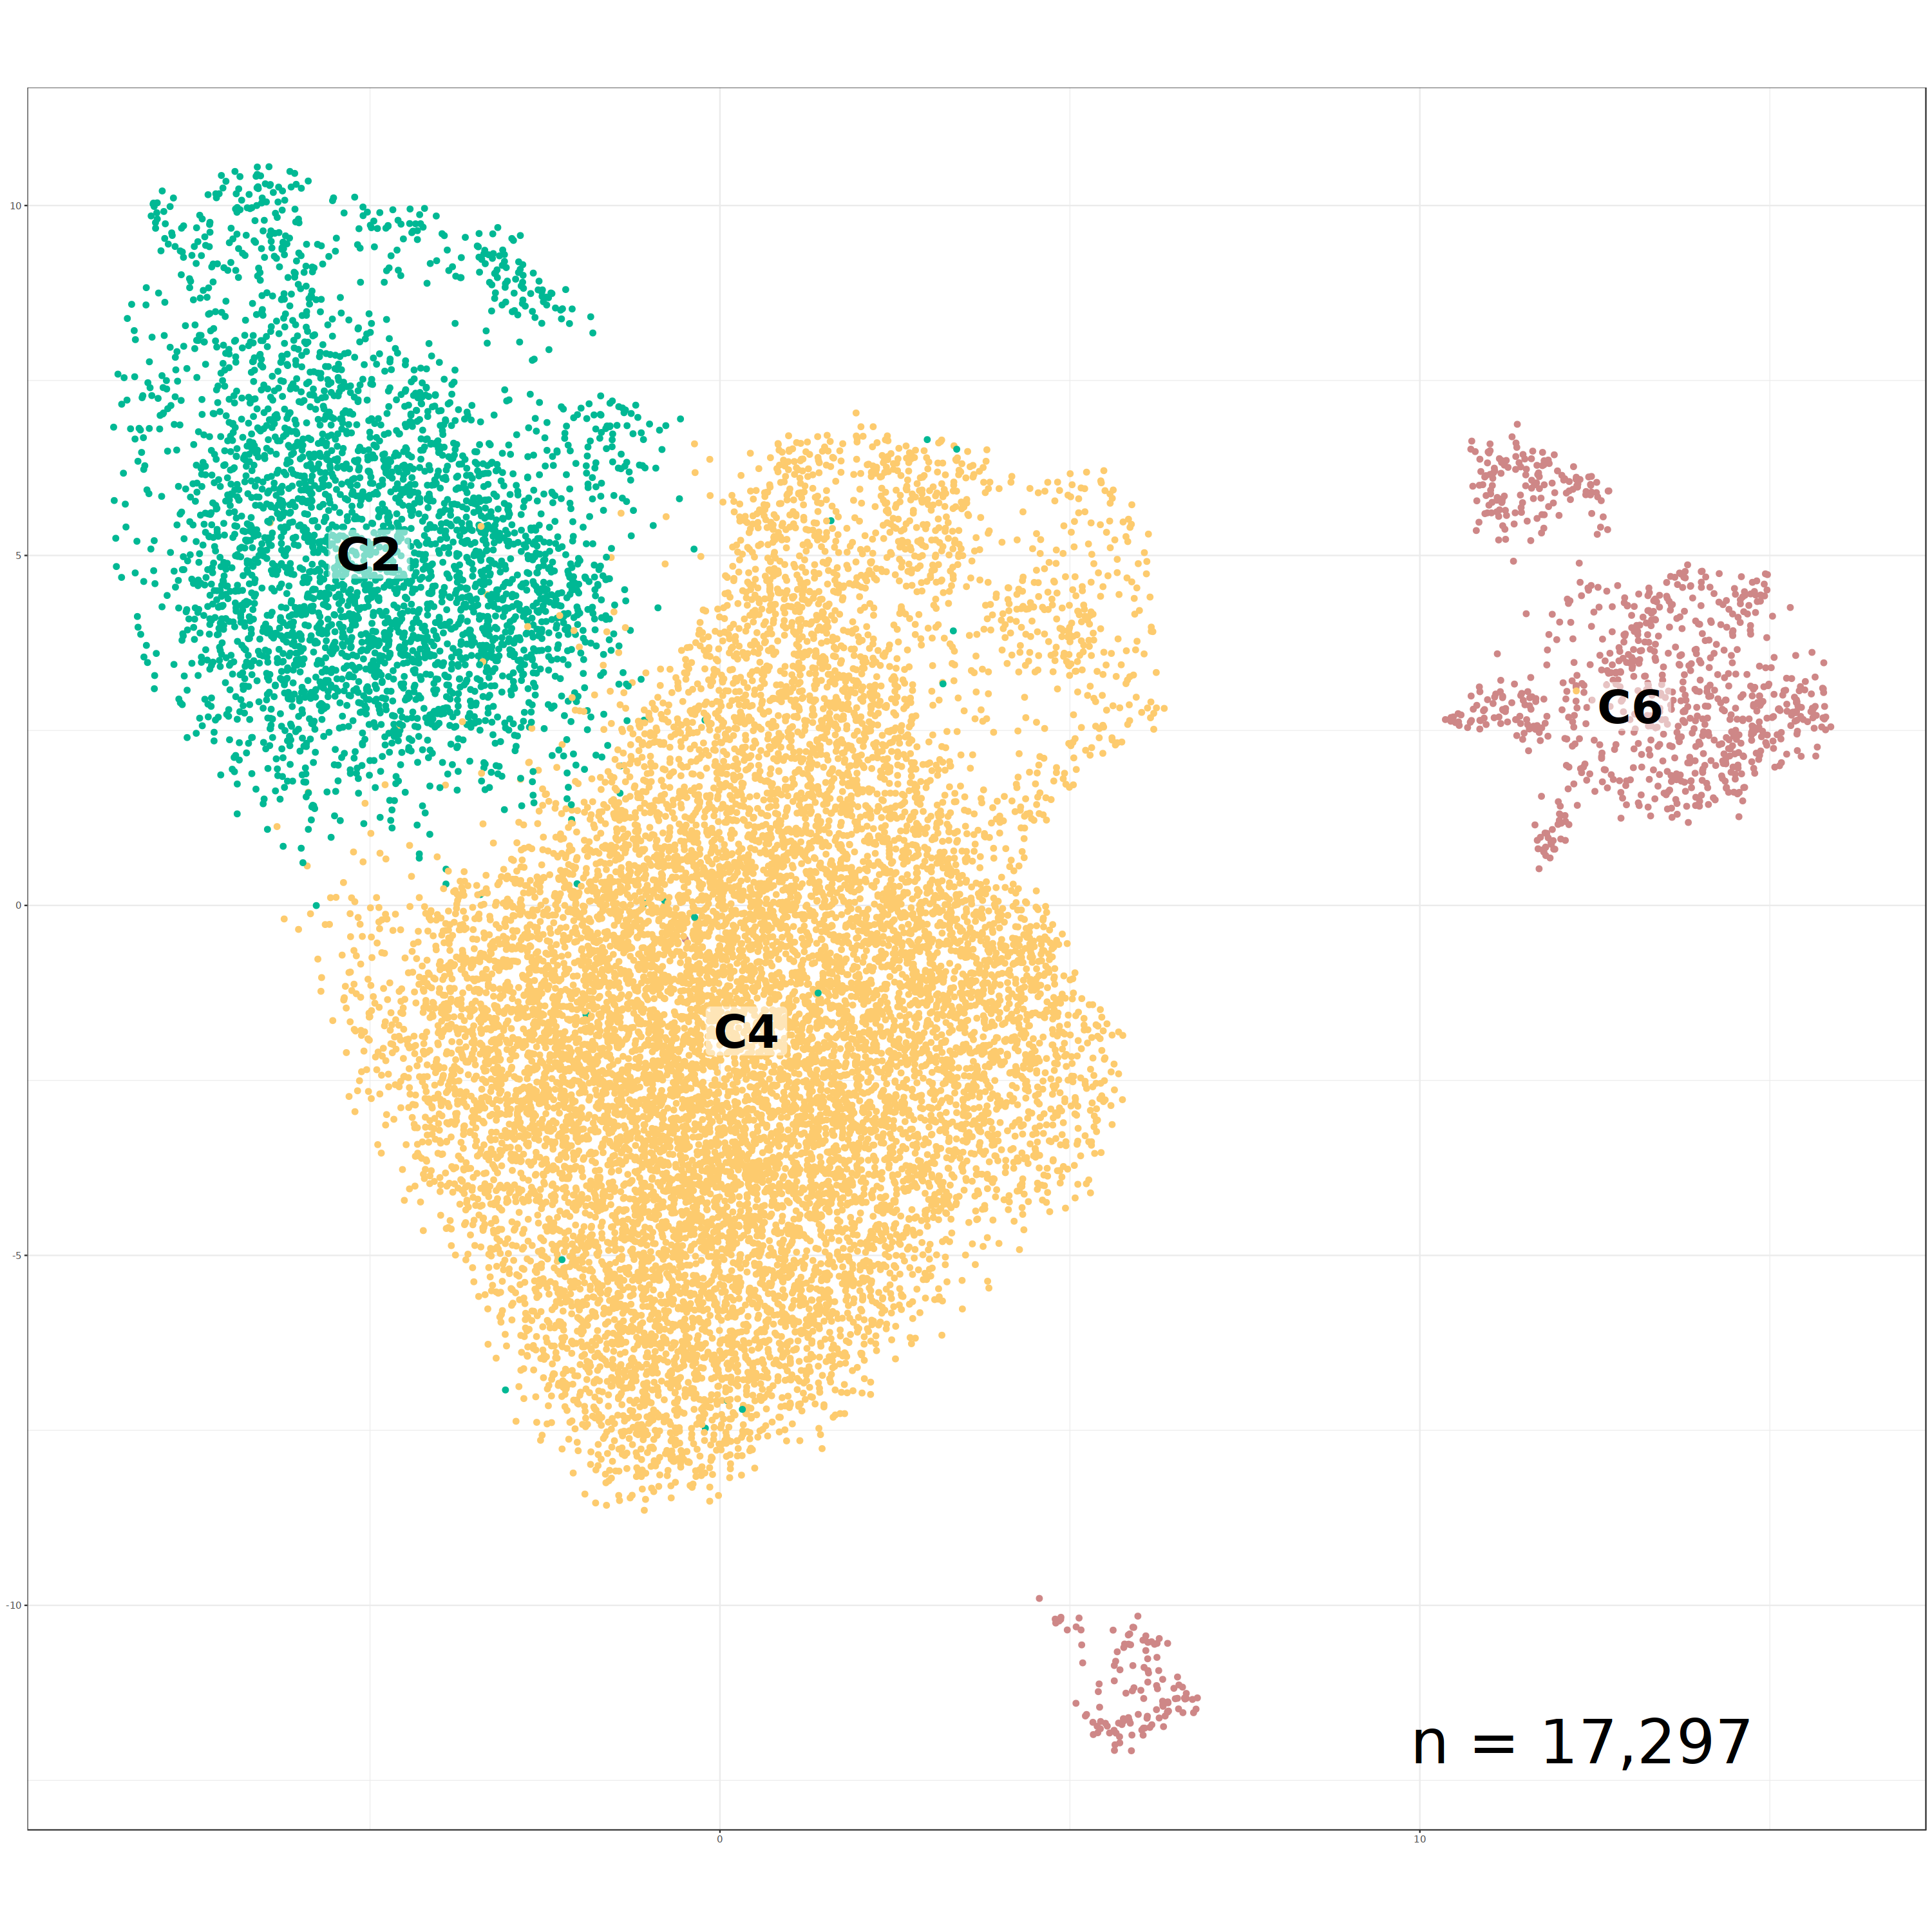

In [13]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = p4$data$x,
    UMAP_2 = p4$data$y,
    seurat_clusters = p4$data$color
  ) %>%
  group_by(seurat_clusters) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

p <- p4$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  geom_label(
    data = UMAP_centers_cell_type,
    mapping = aes(x, y, label = seurat_clusters),
    size = 15,
    fill = 'white',
    color = 'black',
    fontface = 'bold',
    alpha = 0.5,
    label.size = 0,
    show.legend = FALSE
  ) +
  theme_bw() +
  #expand_limits(x = c(-10,7), y = c(-10,7)) +
  scale_color_manual(values = c("#00b894", "#fdcb6e", "#ce8787")) +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = 'none') +
  coord_fixed() +
  annotate(
    geom = 'text', x = 16, y = -Inf,
    label = paste0('n = ', format(nrow(p4$data), big.mark = ',', trim = TRUE)),
    vjust = -1.5, hjust = 1.25, color = 'black', size = 20
  )

p

In [14]:
ggsave("/home/adufour/work/notebook/plots/omics/stemcells_cells_cluster.svg", p, height = 16, width = 16)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3830344a187f34-Date-2023-08-22_Time-16-00-56.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3830344a187f34-Date-2023-08-22_Time-16-00-56.log



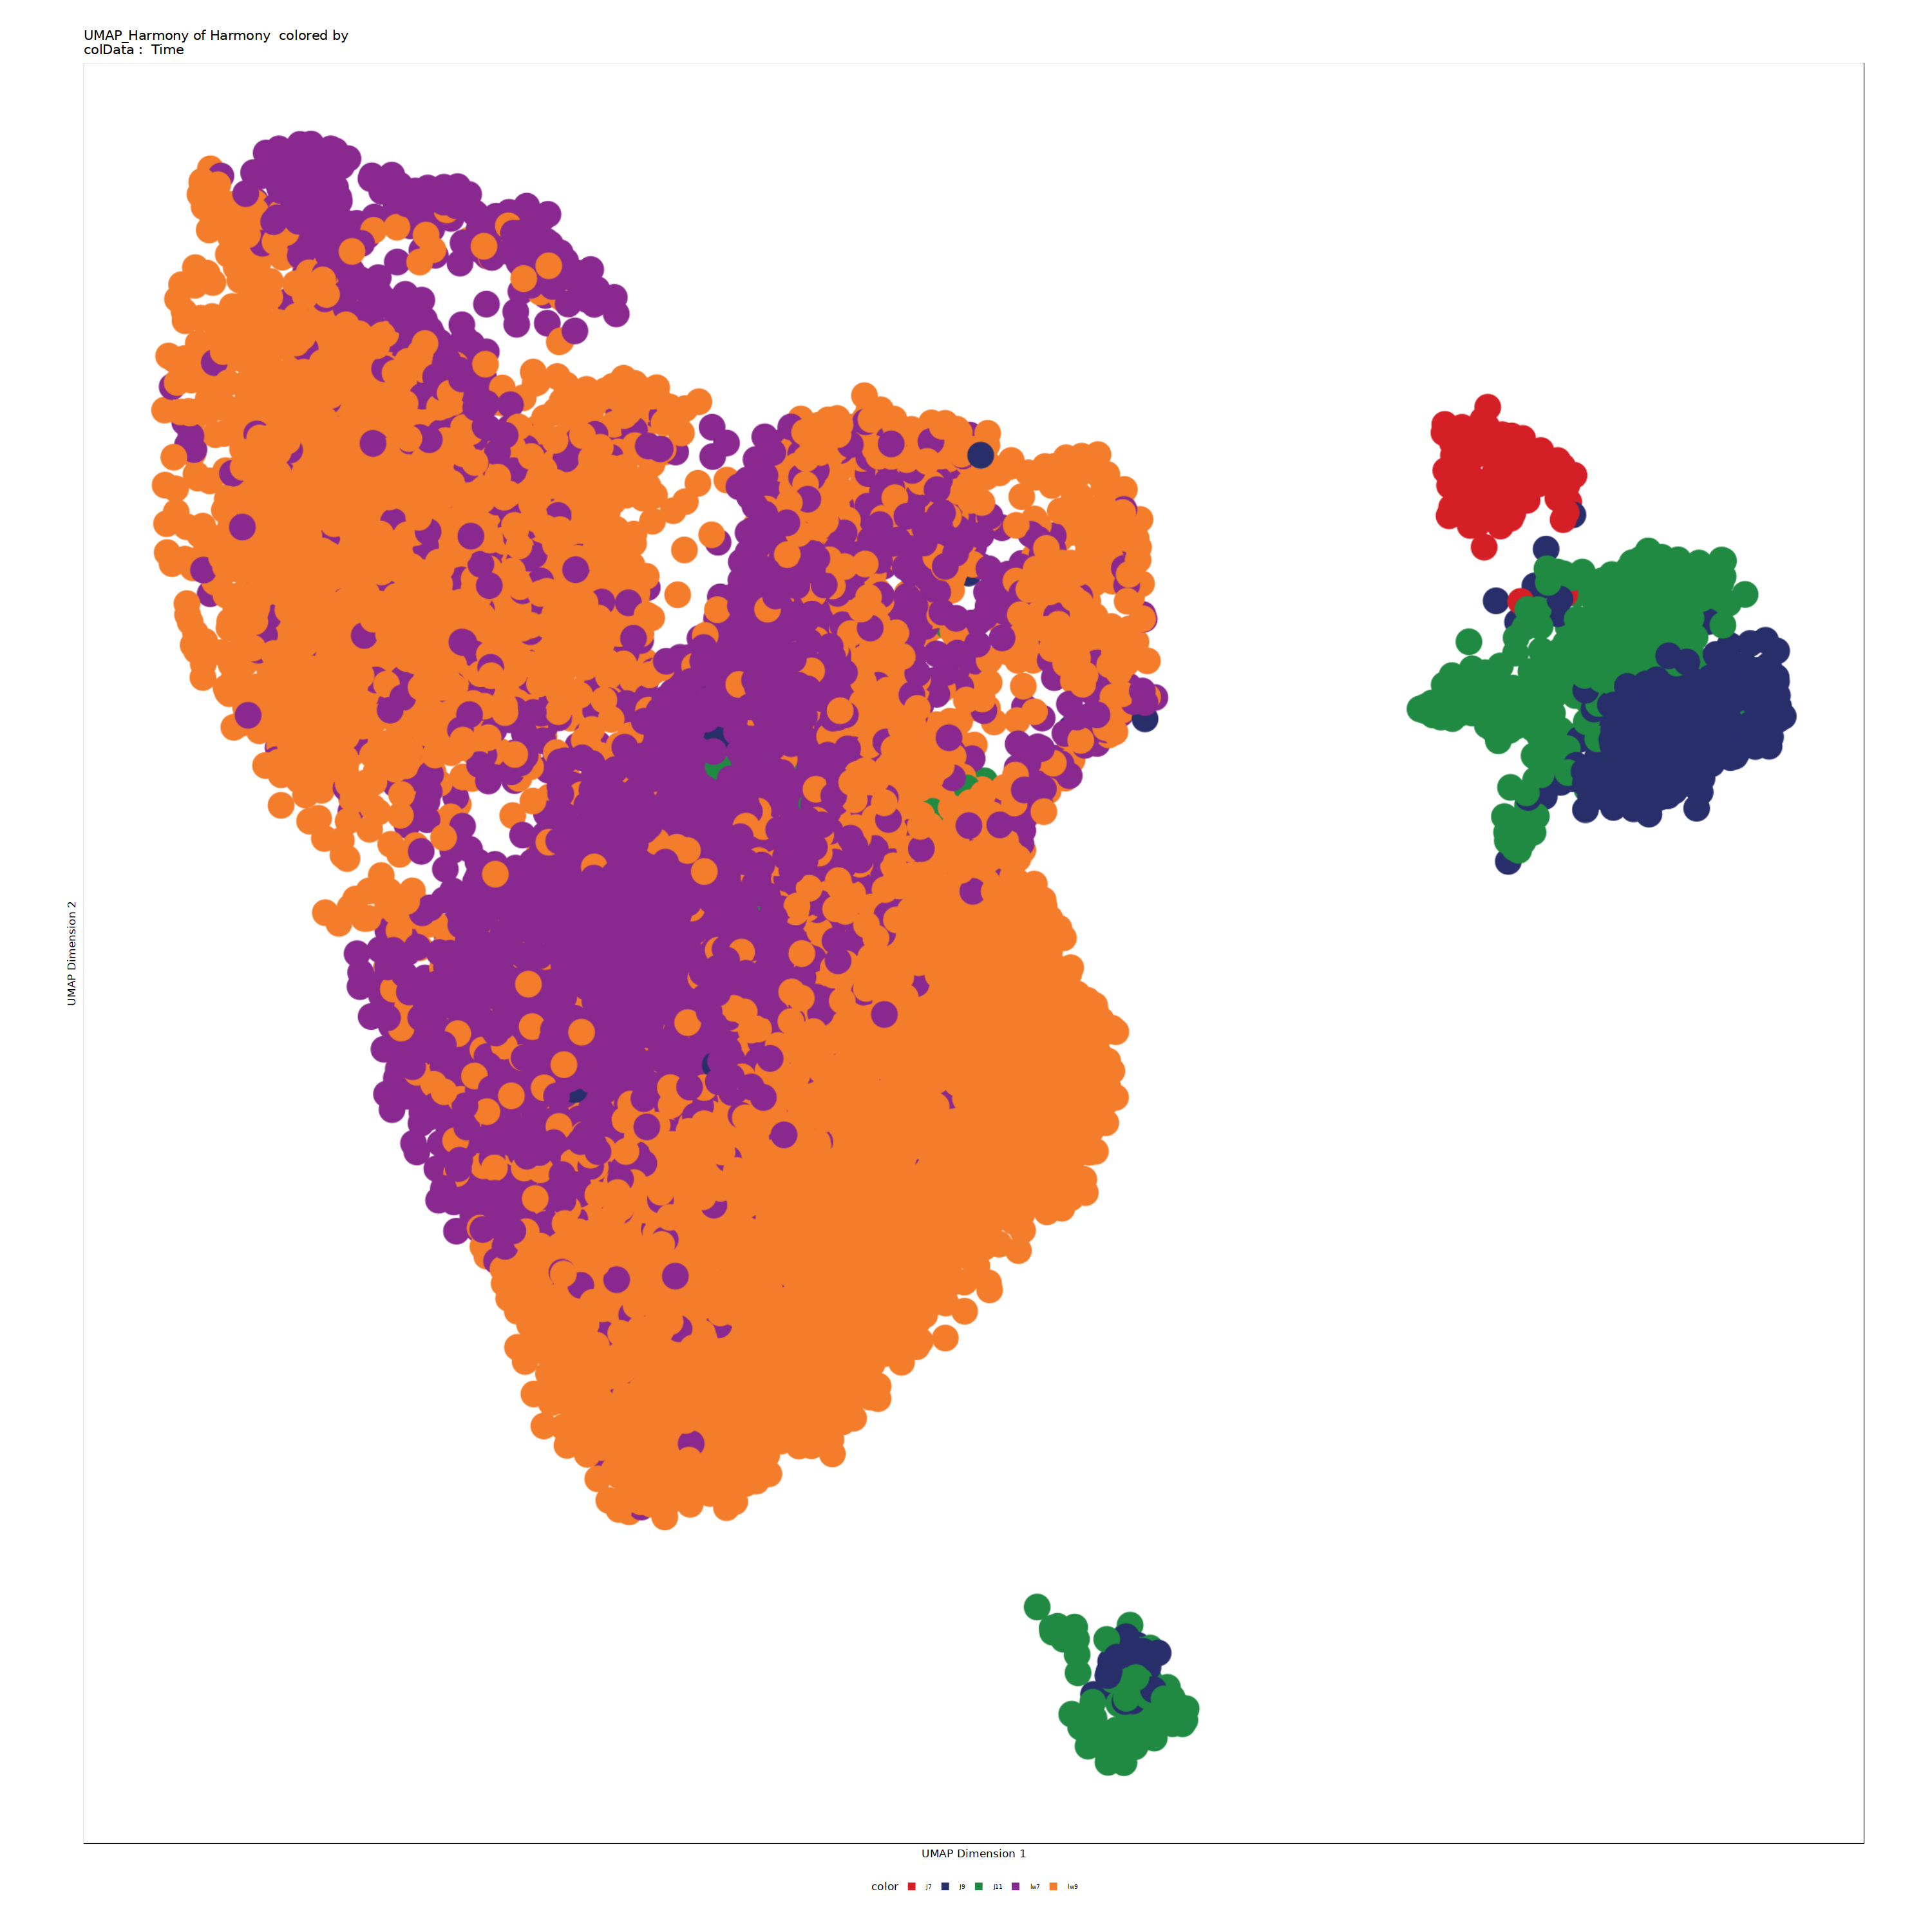

In [15]:
#archrproj <- addClusters(archrproj, reducedDims = "Harmony", name = "Clusters", resolution = 0.1, force = TRUE)
p4 <- plotEmbedding(archrproj_sub, name = "Time", embedding = "UMAP_Harmony", size = 2.5, labelAsFactors=F, labelMeans=F)
p4

In [16]:
p4$data$color <- as.character(p4$data$color)

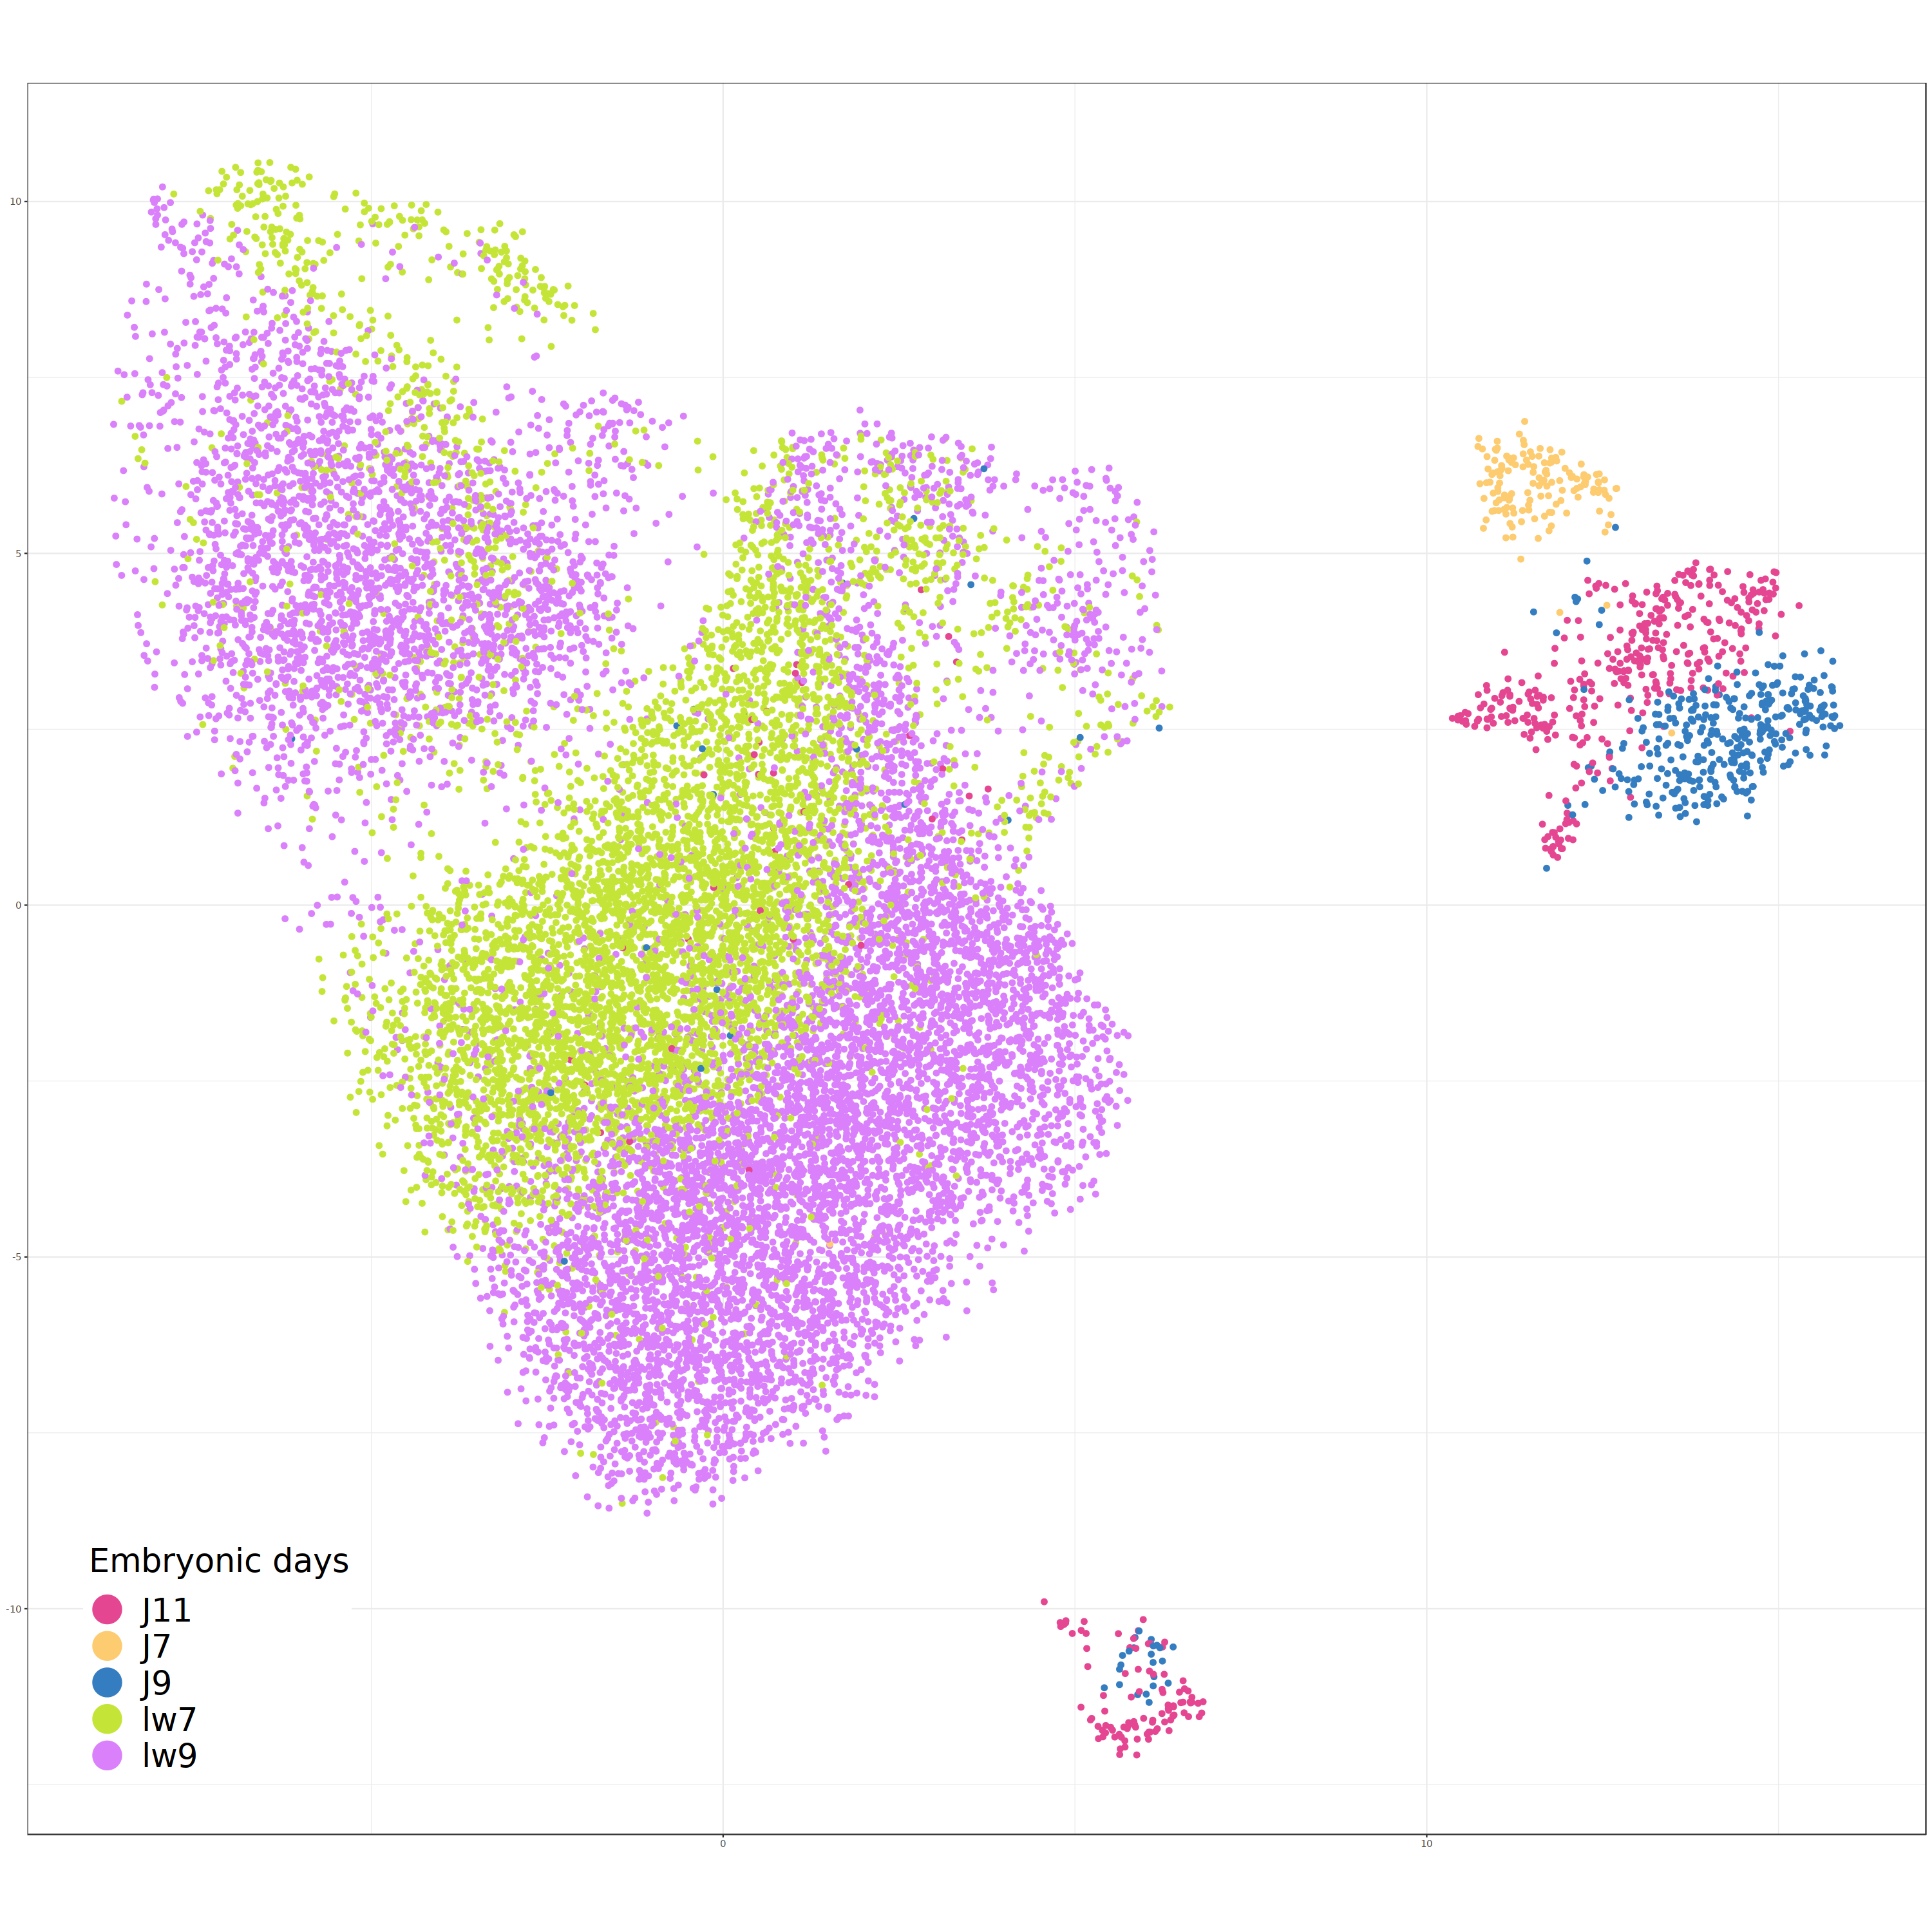

In [19]:
UMAP_centers_cell_type <- tibble(
    UMAP_1 = p4$data$x,
    UMAP_2 = p4$data$y,
    seurat_clusters = p4$data$color
  ) %>%
  group_by(seurat_clusters) %>%
  summarize(x = median(UMAP_1), y = median(UMAP_2))

p <- p4$data %>%
  ggplot(aes(x, y, color = color)) +
  geom_point(size = 2) +
  labs(color = 'Embryonic days') +
  theme_bw() +
  #expand_limits(x = c(-10,7), y = c(-10,7)) +
  scale_color_manual(values = c("#E54692", "#FDCB70", "#357DC1", "#C4E538", "#D980FA"),
                     guide = guide_legend(ncol = 1, override.aes = list(size = 12))) +
  theme(legend.text = element_text(size = 30),
        legend.title = element_text(size = 30),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = c(.10,.1)) +
  coord_fixed()

p

In [20]:
ggsave("/home/adufour/work/notebook/plots/omics/stemcells_cells_time.svg", p, height = 16, width = 16)

In [23]:
markerPeaks <- readRDS("/home/adufour/work/rds_storage/omics/markerPeaks.rds")

In [24]:
head(markerPeaks)

class: SummarizedExperiment 
dim: 6 6 
metadata(2): MatchInfo Params
assays(7): Log2FC Mean ... AUC MeanBGD
rownames(6): 1 2 ... 5 6
rowData names(4): seqnames idx start end
colnames(6): C1 C2 ... C5 C6
colData names(0):

In [25]:
heatmapPeaks <- ArchR::plotMarkerHeatmap(
  seMarker = markerPeaks,
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  transpose = TRUE,
  returnMatrix = FALSE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-a373558fb4dd9-Date-2023-08-04_Time-15-44-55.log
If there is an issue, please report to github with logFile!

Identified 93005 markers!



 [1] "1:251795-252295"       "1:341911-342411"       "1:543717-544217"      
 [4] "1:850088-850588"       "1:1196952-1197452"     "1:1438619-1439119"    
 [7] "1:1667683-1668183"     "1:1692685-1693185"     "1:1807645-1808145"    
[10] "1:2312563-2313063"     "1:2326508-2327008"     "1:3466322-3466822"    
[13] "1:4574236-4574736"     "1:4584140-4584640"     "1:4600655-4601155"    
[16] "1:23503-24003"         "1:249780-250280"       "1:505844-506344"      
[19] "1:789468-789968"       "1:1274240-1274740"     "1:1287678-1288178"    
[22] "1:1288181-1288681"     "1:1318234-1318734"     "1:1334242-1334742"    
[25] "1:1477515-1478015"     "1:1486295-1486795"     "1:1551199-1551699"    
[28] "1:1723905-1724405"     "1:1729874-1730374"     "1:1801526-1802026"    
[31] "1:5591-6091"           "1:195449-195949"       "1:196319-196819"      
[34] "1:447469-447969"       "1:451259-451759"       "1:451801-452301"      
[37] "1:493285-493785"       "1:1415333-1415833"     "1:1694514-1695014"    

Warning message:
“le package ‘circlize’ a été compilé avec la version R 4.2.3”
Adding Annotations..

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-a373558fb4dd9-Date-2023-08-04_Time-15-44-55.log



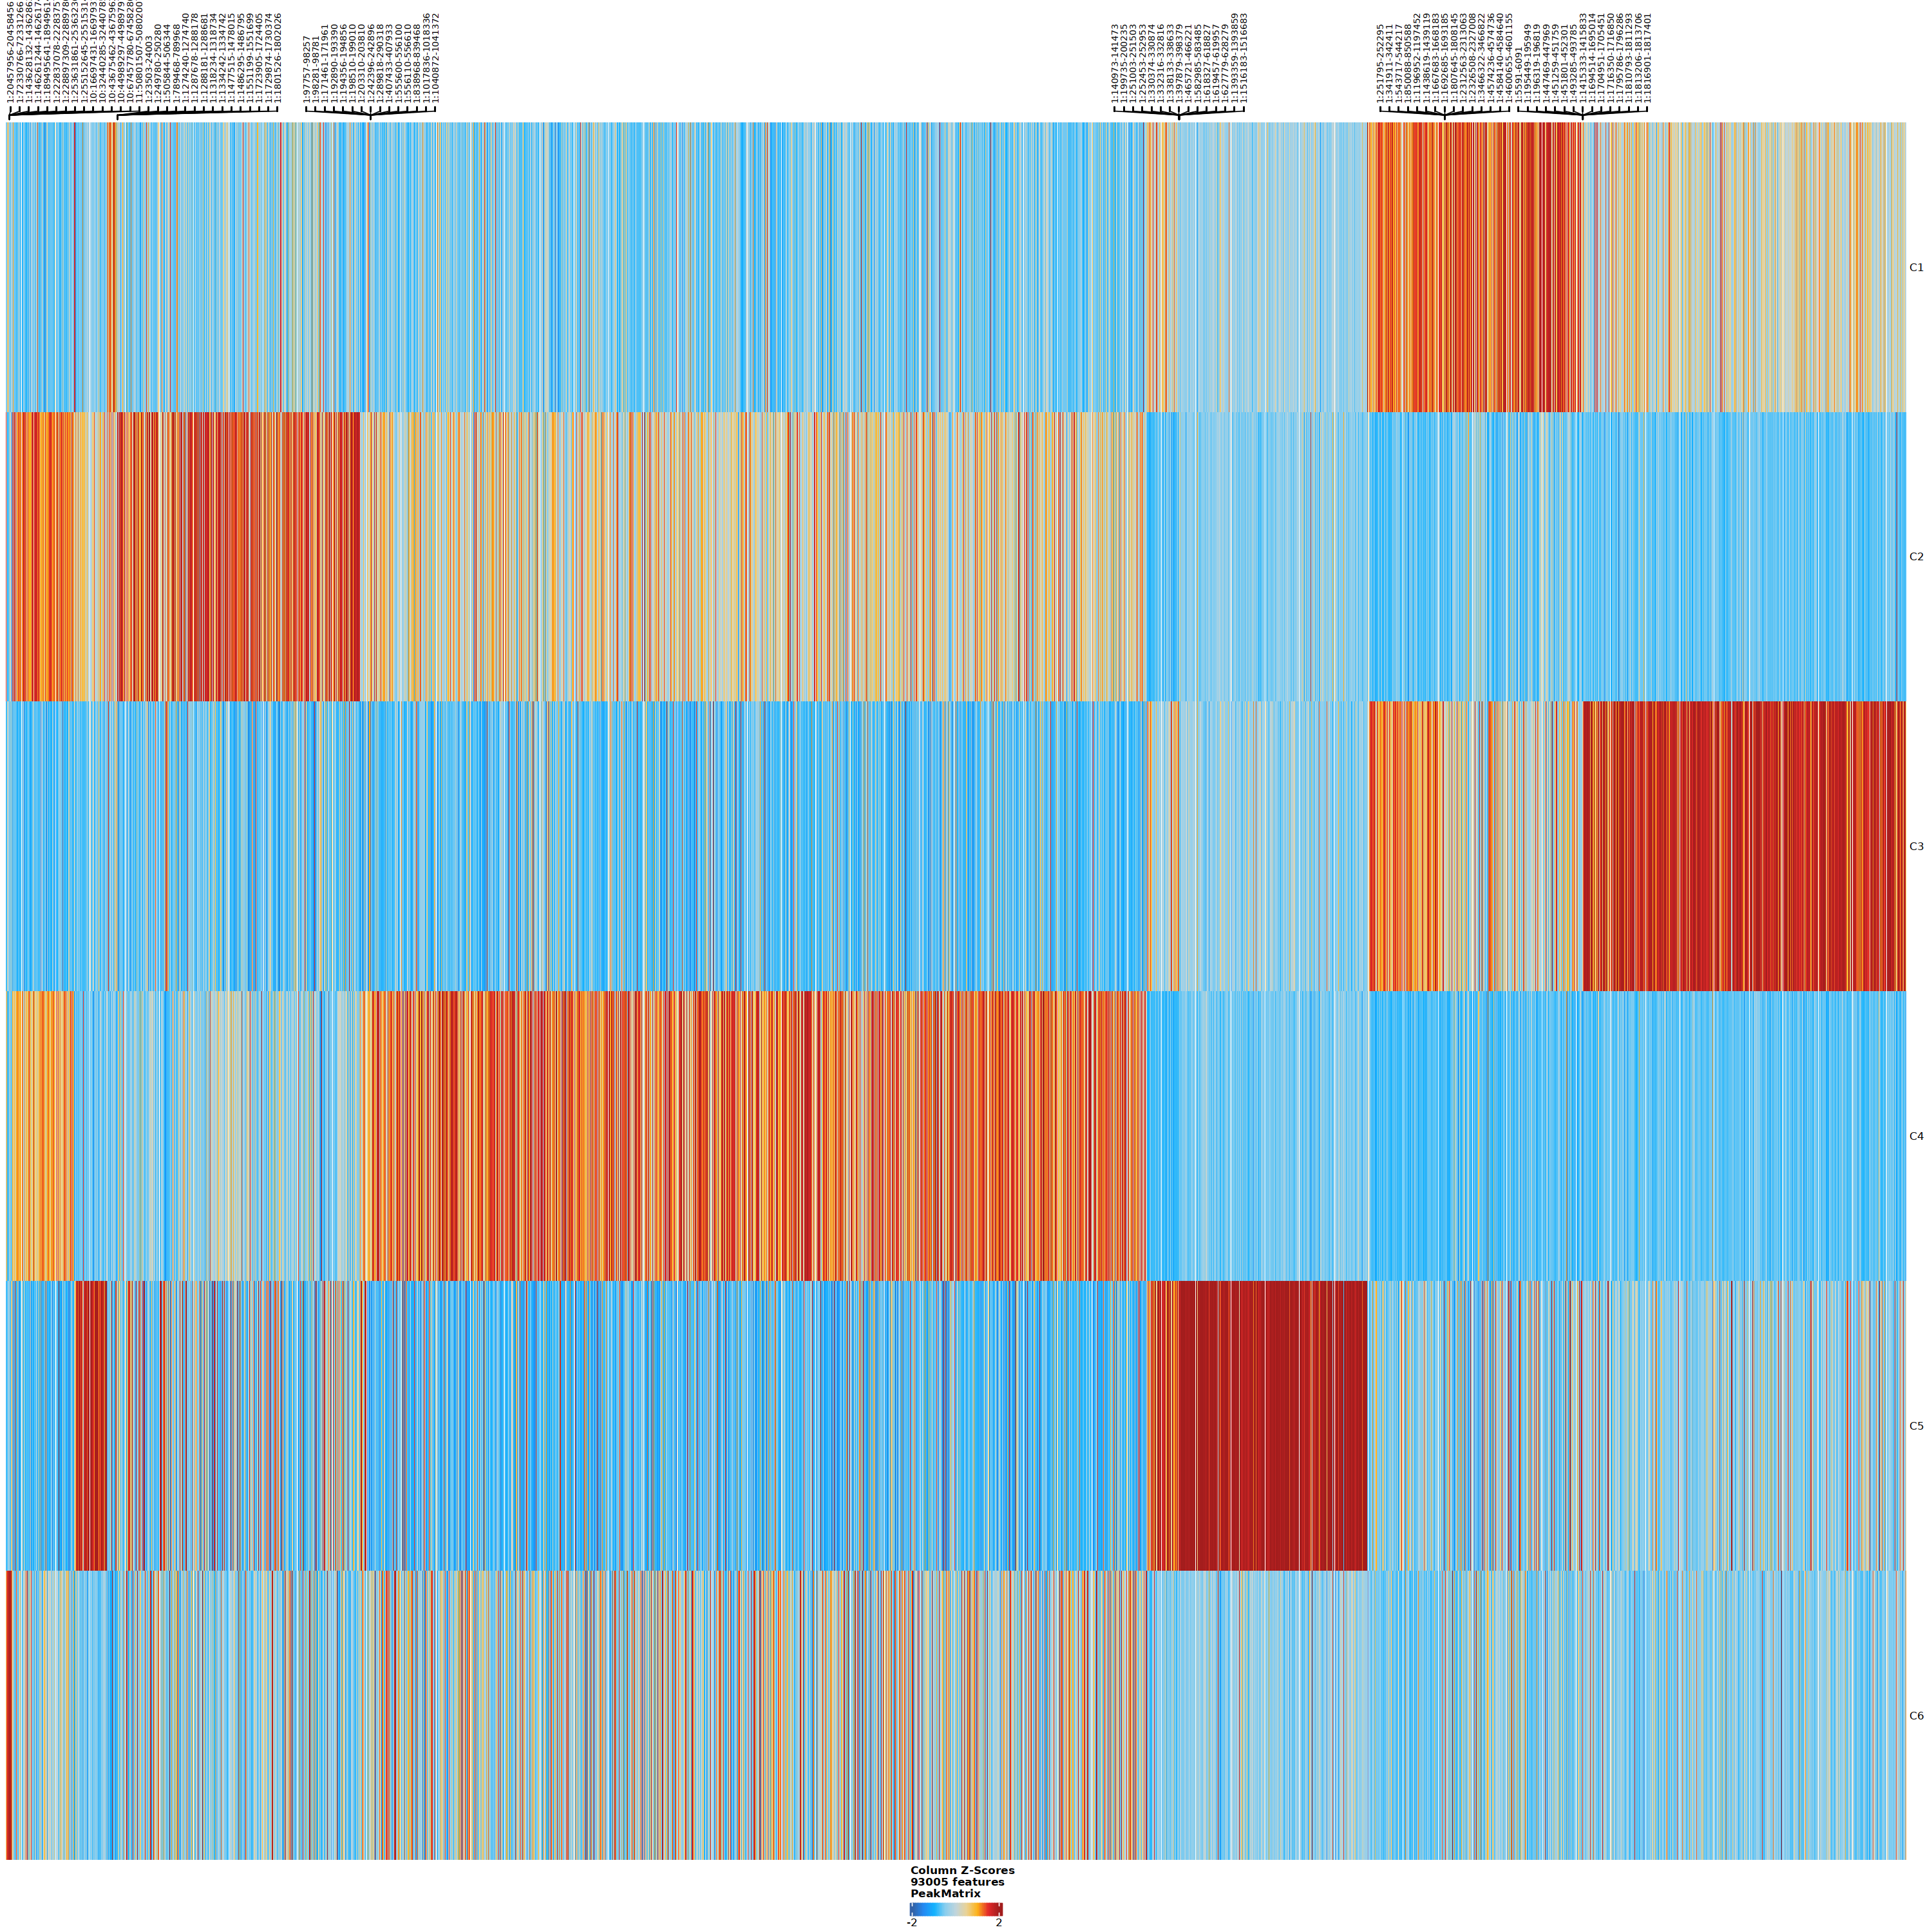

In [26]:
draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [87]:
heatmapPeaks <- ArchR::plotMarkerHeatmap(
  seMarker = markerPeaks,
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  transpose = FALSE,
  returnMatrix = TRUE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-334e44224a91e8-Date-2023-08-04_Time-15-07-34.log
If there is an issue, please report to github with logFile!

Identified 93005 markers!



 [1] "1:251795-252295"       "1:341911-342411"       "1:543717-544217"      
 [4] "1:850088-850588"       "1:1196952-1197452"     "1:1438619-1439119"    
 [7] "1:1667683-1668183"     "1:1692685-1693185"     "1:1807645-1808145"    
[10] "1:2312563-2313063"     "1:2326508-2327008"     "1:3466322-3466822"    
[13] "1:4574236-4574736"     "1:4584140-4584640"     "1:4600655-4601155"    
[16] "1:23503-24003"         "1:249780-250280"       "1:505844-506344"      
[19] "1:789468-789968"       "1:1274240-1274740"     "1:1287678-1288178"    
[22] "1:1288181-1288681"     "1:1318234-1318734"     "1:1334242-1334742"    
[25] "1:1477515-1478015"     "1:1486295-1486795"     "1:1551199-1551699"    
[28] "1:1723905-1724405"     "1:1729874-1730374"     "1:1801526-1802026"    
[31] "1:5591-6091"           "1:195449-195949"       "1:196319-196819"      
[34] "1:447469-447969"       "1:451259-451759"       "1:451801-452301"      
[37] "1:493285-493785"       "1:1415333-1415833"     "1:1694514-1695014"    

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-334e44224a91e8-Date-2023-08-04_Time-15-07-34.log



In [88]:
heatmapPeaks <- as.data.frame(heatmapPeaks)
heatmapPeaks$peaks <- rownames(heatmapPeaks)

In [89]:
head(heatmapPeaks)

C1         C2          C3         C4         C5        
12:36884353-36884853  -0.5145187 -0.39809550 -0.7250108 -0.1857846 -0.1732428
2:141380026-141380526 -0.8001507  1.31221972 -0.8802353  0.2311636 -0.8802353
X:33777729-33778229   -0.5350101 -0.13742573 -0.7267569  0.2327048 -0.7267569
6:56426072-56426572   -0.7670394  0.02379428 -0.9297825 -0.6368324  0.6684598
16:23679290-23679790   0.3376492 -0.91389055 -0.2045245 -1.3278506  0.9478938
1:205985785-205986285 -0.7072808  1.37217081 -0.8540929 -0.4218351 -0.5670628
                      C6       peaks                
12:36884353-36884853  1.996652 12:36884353-36884853 
2:141380026-141380526 1.017238 2:141380026-141380526
X:33777729-33778229   1.893245 X:33777729-33778229  
6:56426072-56426572   1.641400 6:56426072-56426572  
16:23679290-23679790  1.160723 16:23679290-23679790 
1:205985785-205986285 1.178101 1:205985785-205986285

In [90]:
peaklist <- heatmapPeaks %>%
        pivot_longer(
        cols = c(1:ncol(.)-1),
        names_to = 'cluster'
    ) %>%
    mutate(value = abs(value)) %>%
    group_by(cluster) %>%
    slice_max(n = 100, order_by = value)

In [91]:
heatmapPeaks_ligne <- heatmapPeaks[heatmapPeaks$peaks %in% peaklist$peaks,c("C6","C2","C4", "C1", "C3", "C5")]

In [70]:
library(svglite)
library(ComplexHeatmap)
library(circlize)
library(RColorBrewer)

In [71]:
dim(heatmapPeaks_ligne)

[1] 3000    3

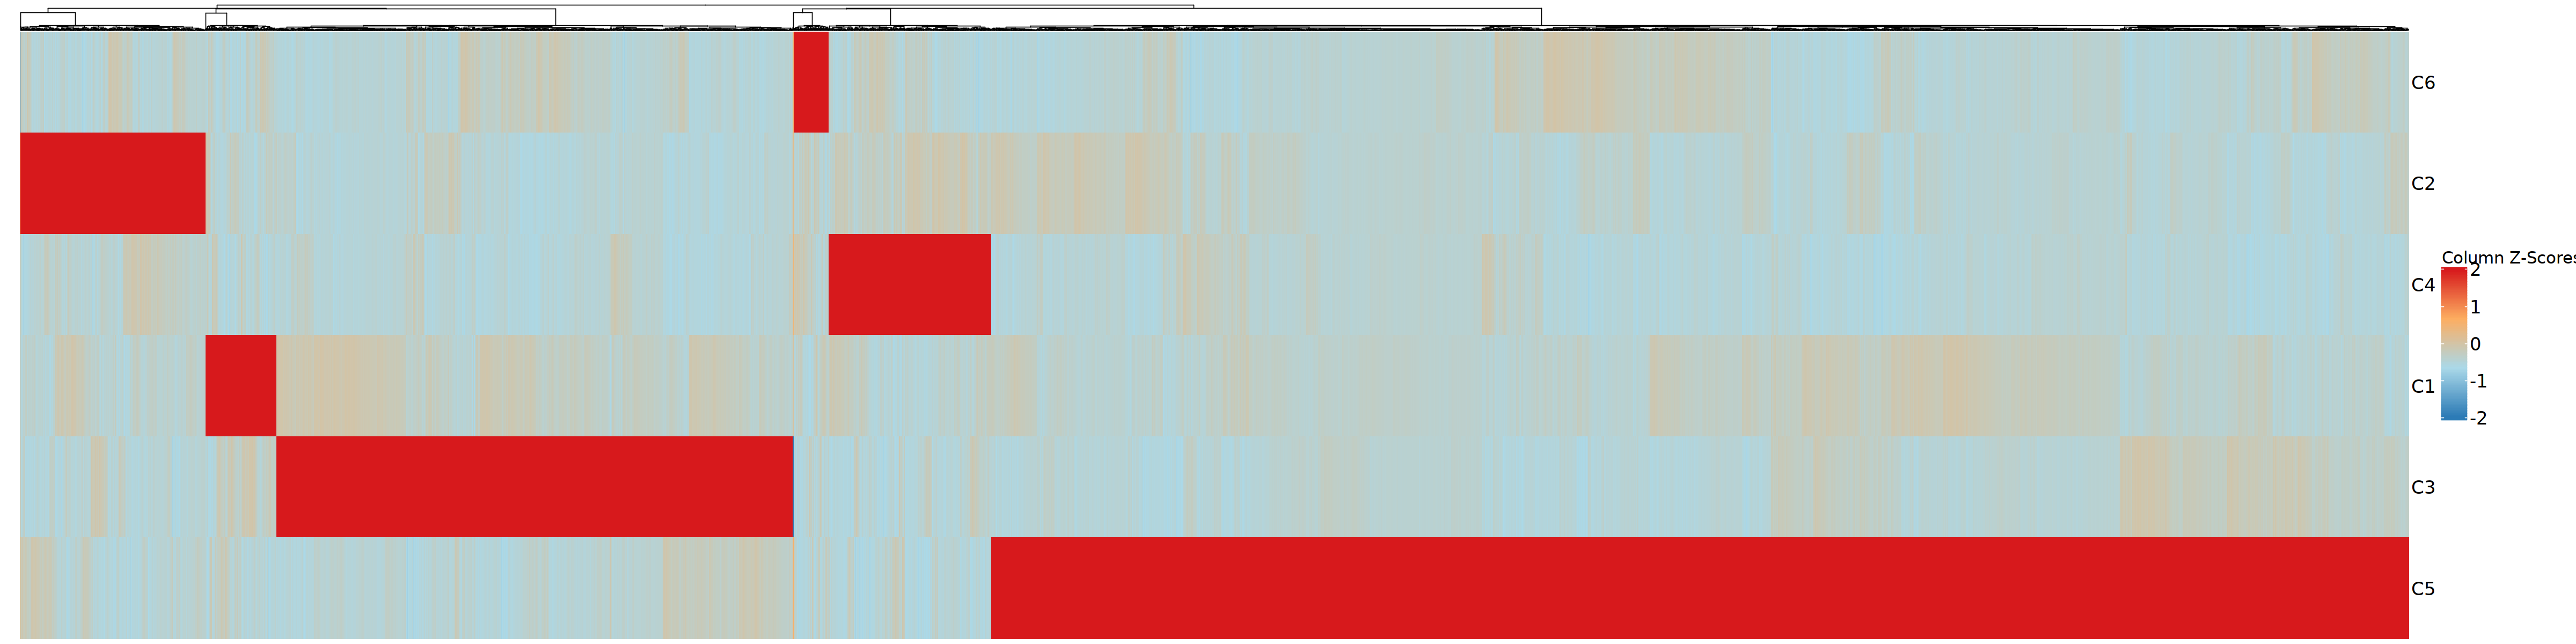

In [92]:
options(repr.plot.width=40, repr.plot.height=10) # To set the figure size in Jupyter
col_fun <- colorRamp2(seq(min(heatmapPeaks_ligne), max(heatmapPeaks_ligne), length = 100), colorRampPalette(rev(brewer.pal(n = 4, name = "RdYlBu")))(100))
lgd <- list(title = "Column Z-Scores", legend_height = unit(6, "cm"), grid_width = unit(1, "cm"), labels_gp = gpar(fontsize = 20), title_gp = gpar(fontsize = 18))
#svglite('/home/adufour/work/notebook/plots/omics/heatmap_peaks.svg', width = 18, height = 5)
hm <- draw(ComplexHeatmap::Heatmap(t(heatmapPeaks_ligne), col = col_fun, show_column_names = FALSE, cluster_rows = FALSE ,
                                   row_names_gp = grid::gpar(fontsize=20), heatmap_legend_param = lgd),
                                   padding = unit(c(2, 8, 2, 2), "mm"))
#dev.off()

# Dot plot

In [21]:
expression_mat <- getMatrixFromProject(
  ArchRProj = archrproj_sub,
  useMatrix = "GeneExpressionMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = 1,
  logFile = createLogFile("getMatrixFromProject")
)

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-3830344f823b24-Date-2023-08-22_Time-16-07-47.log
If there is an issue, please report to github with logFile!

2023-08-22 16:10:01 : Organizing colData, 2.239 mins elapsed.

2023-08-22 16:10:01 : Organizing rowData, 2.243 mins elapsed.

2023-08-22 16:10:01 : Organizing rowRanges, 2.244 mins elapsed.

2023-08-22 16:10:01 : Organizing Assays (1 of 1), 2.244 mins elapsed.

2023-08-22 16:10:04 : Constructing SummarizedExperiment, 2.284 mins elapsed.

2023-08-22 16:10:04 : Finished Matrix Creation, 2.297 mins elapsed.



In [22]:
mat_exp <- assay(expression_mat, "GeneExpressionMatrix")

In [23]:
rownames(mat_exp) <- expression_mat@elementMetadata$name

In [24]:
archrproj <- archrproj_sub

In [58]:
left_join(
    expression_levels_per_cluster,
    percentage_of_cells_expressing_gene %>%
    dplyr::select(id_to_merge, percent_cells),
    by = 'id_to_merge'
  )

cluster gene               expression   id_to_merge           percent_cells
1  C6      GATA6              0.4014274298 C6_GATA6              0.200799201  
2  C6      GATA3              0.0674508821 C6_GATA3              0.036963037  
3  C6      CDX2               0.0612619431 C6_CDX2               0.033966034  
4  C6      DNMT3A             0.7720296531 C6_DNMT3A             0.499500500  
5  C6      ENSSSCG00000001393 1.9873526387 C6_ENSSSCG00000001393 0.681318681  
6  C6      NANOG              0.3701879232 C6_NANOG              0.281718282  
7  C6      SOX2               0.5148920390 C6_SOX2               0.379620380  
8  C4      GATA6              0.0967392371 C4_GATA6              0.069836553  
9  C4      GATA3              0.0097640737 C4_GATA3              0.007820443  
10 C4      CDX2               0.0000000000 C4_CDX2               0.000547431  
11 C4      DNMT3A             0.9303441643 C4_DNMT3A             0.542660515  
12 C4      ENSSSCG00000001393 2.9556199839 C4_ENSSSCG00000001393 0.876906233  
13 C4      NANOG              0.7016926931 C4_NANOG              0.442167827  
14 C4      SOX2               1.4269782634 C4_SOX2               0.677328537  
15 C2      GATA6              0.5871465883 C2_GATA6              0.397264178  
16 C2      GATA3              0.1756186019 C2_GATA3              0.134511257  
17 C2      CDX2               0.0002451369 C2_CDX2               0.001139926  
18 C2      DNMT3A             0.9109546567 C2_DNMT3A             0.616984896  
19 C2      ENSSSCG00000001393 3.0000000000 C2_ENSSSCG00000001393 0.880592761  
20 C2      NANOG              0.8120459700 C2_NANOG              0.563123397  
21 C2      SOX2               1.1255827018 C2_SOX2               0.650327729

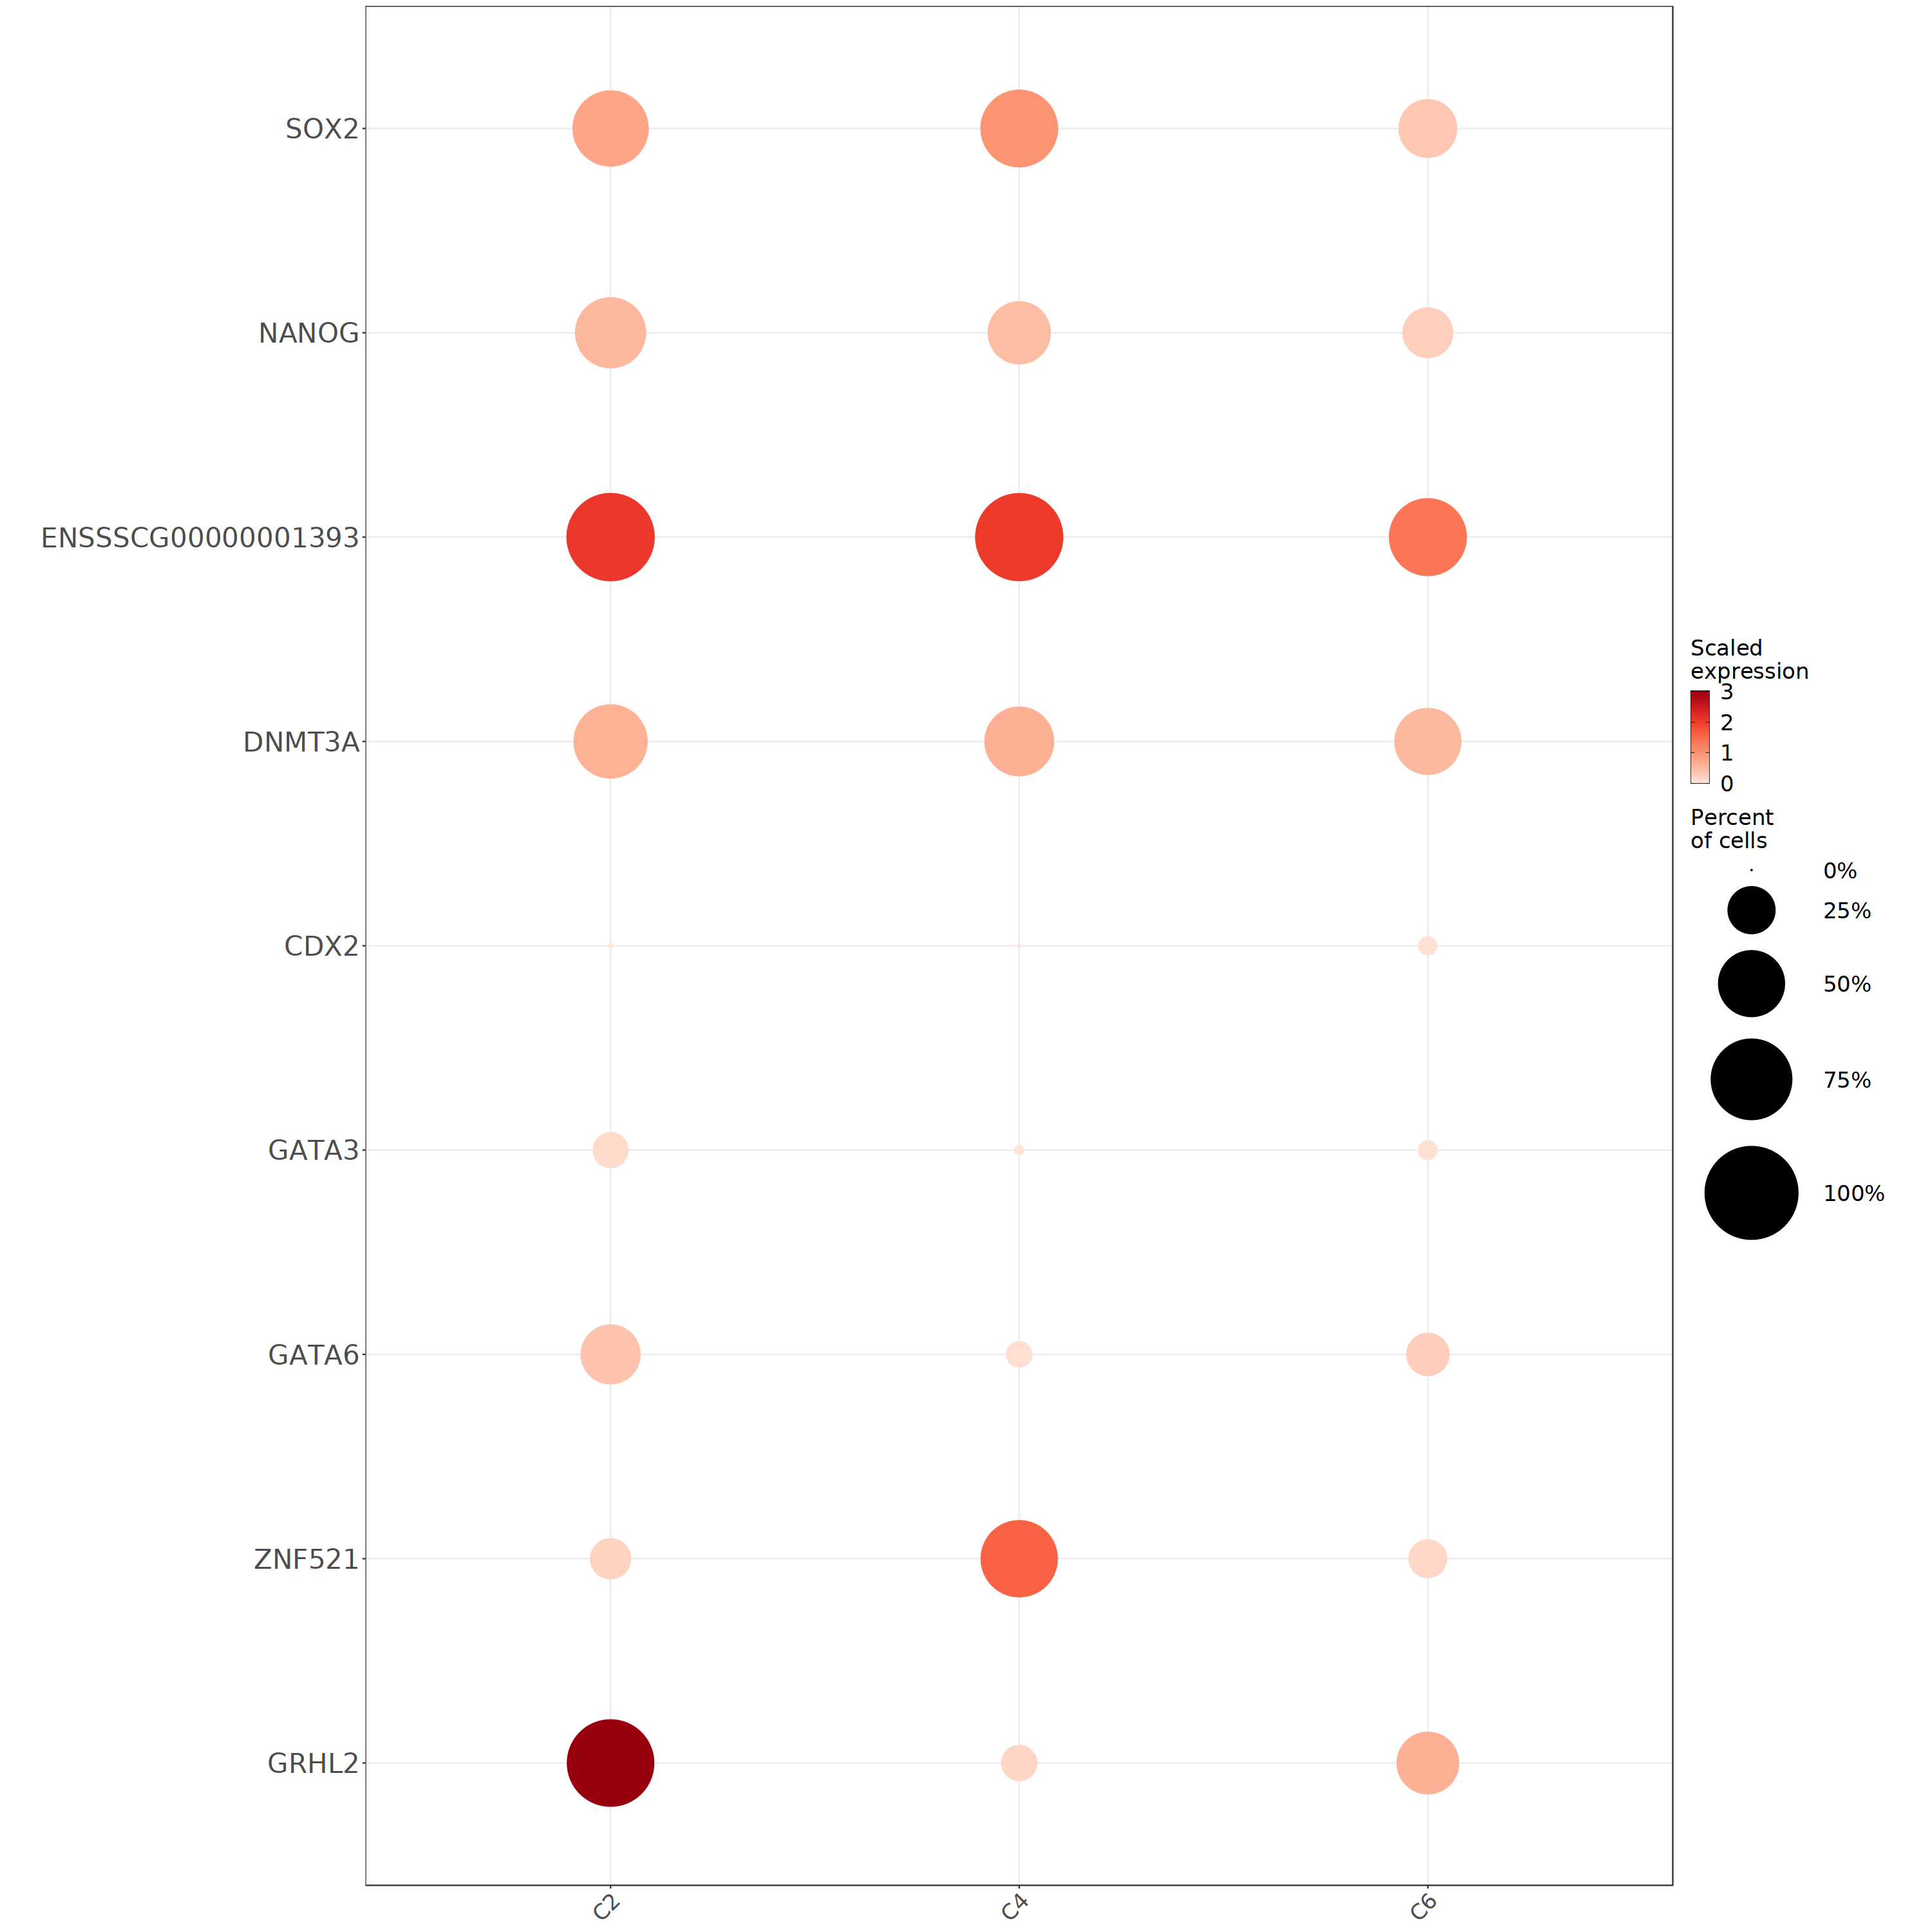

In [60]:
cluster_ids <- unique(getCellColData(archrproj)$Clusters)

# select a set of genes for which we want to show expression
genes_to_show <- c("GRHL2", "ZNF521", "GATA6", "GATA3", "CDX2", "DNMT3A",
                   "ENSSSCG00000001393", "NANOG", "SOX2")

# for every cluster-gene combination, calculate the average expression across
# all cells and then transform the data into a data frame
expression_levels_per_cluster <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- rownames(getCellColData(archrproj))[which(getCellColData(archrproj)$Clusters == x)]
      Matrix::rowMeans(mat_exp[genes_to_show,cells_in_current_cluster])
    }
  ) %>%
  t() %>%
  rescale(to=c(0,3)) %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(expression = value) %>%
  mutate(id_to_merge = paste0(cluster, '_', gene))

# for every cluster-gene combination, calculate the percentage of cells in the
# respective group that has at least 1 transcript (this means we consider it
# as expressing the gene) and then transform the data into a data frame
percentage_of_cells_expressing_gene <- sapply(
    cluster_ids, function(x) {
      cells_in_current_cluster <- rownames(getCellColData(archrproj))[which(getCellColData(archrproj)$Clusters == x)]
      Matrix::rowSums(mat_exp[genes_to_show,cells_in_current_cluster] != 0)
    }
  ) %>%
  t() %>%
  as.data.frame() %>%
  mutate(cluster = rownames(.)) %>%
  dplyr::select(cluster, everything()) %>%
  pivot_longer(
    cols = c(2:ncol(.)),
    names_to = 'gene'
  ) %>%
  dplyr::rename(cell_count = value) %>%
  left_join(
    .,
    as.data.frame(getCellColData(archrproj)) %>%
      group_by(Clusters) %>%
      tally() %>%
      dplyr::rename(cluster = Clusters),
    by = 'cluster') %>%
  mutate(
    id_to_merge = paste0(cluster, '_', gene),
    percent_cells = cell_count / n
  )

# merge the two data frames created before and plot the data
p <- left_join(
    expression_levels_per_cluster,
    percentage_of_cells_expressing_gene %>%
    dplyr::select(id_to_merge, percent_cells),
    by = 'id_to_merge'
  ) %>%
  mutate(cluster = factor(cluster, levels = c("C2", "C4", "C6"))) %>%
  mutate(gene = factor(gene, levels = genes_to_show)) %>%
  ggplot(aes(cluster, gene)) +
  geom_point(aes(color = expression, size = percent_cells)) +
  scale_color_distiller(
    palette = 'Reds',
    direction = 1,
    name = 'Scaled\nexpression',
    limits = c(0, 3),
    guide = guide_colorbar(frame.colour = "black", ticks.colour = "black")
  ) +
  scale_size(name = 'Percent\nof cells', range = c(0,40), labels = scales::percent, limits = c(0, 1)) +
  labs(y = 'Cluster', color = 'Expression') +
  coord_fixed(ratio = 0.5) +
  theme_bw() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    legend.text = element_text(size = 20),
    legend.title = element_text(size = 20),
    axis.title.y = element_blank(),
    axis.text.y = element_text(size = 25, face = "italic")
  )

p

In [61]:
ggsave("/home/adufour/work/notebook/plots/omics/dotplot_marker_pluripotency.svg", p, height = 16, width = 16)